<a href="https://colab.research.google.com/github/flahbocchino/pbl_fase6_FlaviaBocchino---PedroZani/blob/main/PBL_Fase_6_%E2%80%94_Detec%C3%A7%C3%A3o_de_Objetos_(Desenhos_e_Sof%C3%A1s)_com_YOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 PBL Fase 6 — Detecção de Objetos (Desenhos e Sofás) com YOLOv5

**Curso:** Inteligência Artificial — FIAP  
**Alunos:**  
- Flavia Bocchino (RM564213)  
- Pedro Zani (RM564956)  

---

## 🎯 Objetivo
Treinar um modelo de detecção de objetos utilizando **YOLOv5**, capaz de identificar duas classes principais:
- **Classe 0:** desenho  
- **Classe 1:** sofá  

O projeto faz parte da Fase 6 do PBL e utiliza imagens rotuladas manualmente na plataforma [MakeSense.ai](https://www.makesense.ai/).

---

## 🧩 Estrutura do Notebook
1️⃣ Instalação do YOLOv5 e dependências  
2️⃣ Configuração do dataset (puxado do GitHub)  
3️⃣ Treinamento do modelo  
4️⃣ Avaliação dos resultados  
5️⃣ Exportação do modelo treinado  

---


In [2]:
# 1) Instalação do YOLOv5 e dependências
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17608, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 17608 (delta 16), reused 0 (delta 0), pack-reused 17573 (from 2)
Receiving objects: 100% (17608/17608), 16.84 MiB | 23.46 MiB/s, done.
Resolving deltas: 100% (11991/11991), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00


In [12]:
REPO_ROOT = "/content/datasets/pbl_fase6_FlaviaBocchino---PedroZani"

# atualizar o repositório já clonado
!git -C "$REPO_ROOT" fetch --all
!git -C "$REPO_ROOT" pull


Fetching origin
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 104 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (104/104), 9.41 MiB | 27.86 MiB/s, done.
Resolving deltas: 100% (2/2), completed with 1 local object.
From https://github.com/flahbocchino/pbl_fase6_FlaviaBocchino---PedroZani
   eb3c36c..dee341b  main       -> origin/main
Updating eb3c36c..dee341b
Fast-forward
 imagens/.gitkeep |   1 +
 imagens/A_01.jpg | Bin 0 -> 65476 bytes
 imagens/A_02.jpg | Bin 0 -> 65029 bytes
 imagens/A_03.jpg | Bin 0 -> 78428 bytes
 imagens/A_05.jpg | Bin 0 -> 94832 bytes
 imagens/A_06.jpg | Bin 0 -> 110852 bytes
 imagens/A_07.jpg | Bin 0 -> 132430 bytes
 imagens/A_08.jpg | Bin 0 -> 69416 bytes
 imagens/A_09.jpg | Bin 0 -> 111280 bytes
 imagens/A_10.jpg | Bin 0 -> 89825 bytes
 imagens/A_11.jpg | Bin 0 -> 77359 bytes
 imagens/A_12.jpg | Bin 0 -> 67536 bytes
 imagen

In [13]:
!ls -lah "$REPO_ROOT" | head -n 50
!ls -lah "$REPO_ROOT/imagens" | head -n 20


total 32K
drwxr-xr-x 7 root root 4.0K Oct  9 21:47 .
drwxr-xr-x 5 root root 4.0K Oct  9 20:45 ..
drwxr-xr-x 2 root root 4.0K Oct  9 20:21 artefatos
drwxr-xr-x 3 root root 4.0K Oct  9 20:21 docs
drwxr-xr-x 8 root root 4.0K Oct  9 21:47 .git
drwxr-xr-x 2 root root 4.0K Oct  9 21:47 imagens
drwxr-xr-x 2 root root 4.0K Oct  9 20:21 notebooks
-rw-r--r-- 1 root root  139 Oct  9 20:21 README.md
total 9.8M
drwxr-xr-x 2 root root 4.0K Oct  9 21:47 .
drwxr-xr-x 7 root root 4.0K Oct  9 21:47 ..
-rw-r--r-- 1 root root  64K Oct  9 21:47 A_01.jpg
-rw-r--r-- 1 root root  64K Oct  9 21:47 A_02.jpg
-rw-r--r-- 1 root root  77K Oct  9 21:47 A_03.jpg
-rw-r--r-- 1 root root  93K Oct  9 21:47 A_05.jpg
-rw-r--r-- 1 root root 109K Oct  9 21:47 A_06.jpg
-rw-r--r-- 1 root root 130K Oct  9 21:47 A_07.jpg
-rw-r--r-- 1 root root  68K Oct  9 21:47 A_08.jpg
-rw-r--r-- 1 root root 109K Oct  9 21:47 A_09.jpg
-rw-r--r-- 1 root root  88K Oct  9 21:47 A_10.jpg
-rw-r--r-- 1 root root  76K Oct  9 21:47 A_11.jpg
-rw-r--r-- 

In [14]:
IMG_SRC = f"{REPO_ROOT}/imagens"  # imagens A_*.jpg e B_*.jpg
LBL_SRC = REPO_ROOT               # .txt (A_*.txt / B_*.txt) na raiz do repo


In [16]:
# caminho raiz do repo já clonado
REPO_ROOT = "/content/datasets/pbl_fase6_FlaviaBocchino---PedroZani"

# ORIGENS:
IMG_SRC = f"{REPO_ROOT}/imagens"    # suas imagens .jpg/.png
LBL_SRC = f"{REPO_ROOT}/artefatos"  # seus .txt estão aqui!

import glob
n_imgs = len(glob.glob(f"{IMG_SRC}/*.jpg")) + len(glob.glob(f"{IMG_SRC}/*.png"))
n_lbls = len(glob.glob(f"{LBL_SRC}/*.txt"))
print("imagens:", n_imgs, "| labels:", n_lbls)


imagens: 99 | labels: 99


In [17]:
# Estrutura de destino para o treinamento
DATA_ROOT = "/content/datasets"
IMAGES_DST = f"{DATA_ROOT}/images"
LABELS_DST = f"{DATA_ROOT}/labels"

import os
for p in [f"{IMAGES_DST}/train", f"{IMAGES_DST}/val", f"{IMAGES_DST}/test",
          f"{LABELS_DST}/train", f"{LABELS_DST}/val", f"{LABELS_DST}/test"]:
    os.makedirs(p, exist_ok=True)

print("Destino criado:\n -", IMAGES_DST, "\n -", LABELS_DST)


Destino criado:
 - /content/datasets/images 
 - /content/datasets/labels


In [20]:
REPO_ROOT = "/content/datasets/pbl_fase6_FlaviaBocchino---PedroZani"
IMG_SRC   = f"{REPO_ROOT}/imagens"     # onde estão A_*.jpg / B_*.jpg
LBL_SRC   = f"{REPO_ROOT}/artefatos"   # onde estão A_*.txt / B_*.txt   <-- importante!
IMAGES_DST = "/content/datasets/images"
LABELS_DST = "/content/datasets/labels"

import os
for split in ("train","val","test"):
    os.makedirs(f"{IMAGES_DST}/{split}", exist_ok=True)
    os.makedirs(f"{LABELS_DST}/{split}", exist_ok=True)


In [21]:
import glob, pathlib, random, shutil, os

# Mapeia imagem e label pelo "stem" (nome sem extensão)
img_by_stem = {}
for ext in ("jpg","jpeg","png","JPG","JPEG","PNG"):
    for p in glob.glob(f"{IMG_SRC}/*.{ext}"):
        img_by_stem[pathlib.Path(p).stem] = p

lbl_by_stem = {pathlib.Path(p).stem: p for p in glob.glob(f"{LBL_SRC}/*.txt")}

# Considera apenas os que têm imagem E label (pares)
stems = sorted(set(img_by_stem) & set(lbl_by_stem))
print(f"pares disponíveis: {len(stems)}  (imgs:{len(img_by_stem)}, labels:{len(lbl_by_stem)})")

# Embaralha
random.seed(42)
random.shuffle(stems)

# Força 80/10/9 (ajusta automaticamente o 'test' pelo restante)
n_tr, n_val = 80, 10
n_te = max(0, len(stems) - n_tr - n_val)

tr = stems[:n_tr]
va = stems[n_tr:n_tr+n_val]
te = stems[n_tr+n_val:]   # deve ser 9 quando len(stems)=99

def cp_pair(stems_list, split):
    for s in stems_list:
        shutil.copy(img_by_stem[s], f"{IMAGES_DST}/{split}/")
        shutil.copy(lbl_by_stem[s], f"{LABELS_DST}/{split}/{s}.txt")

# Limpa pastas de destino (opcional, se já tinha coisa)
for split in ("train","val","test"):
    for p in glob.glob(f"{IMAGES_DST}/{split}/*"):  os.remove(p)
    for p in glob.glob(f"{LABELS_DST}/{split}/*"): os.remove(p)

# Copia
cp_pair(tr, "train")
cp_pair(va, "val")
cp_pair(te, "test")

# Checagem
for split in ("train","val","test"):
    ni = len(os.listdir(f"{IMAGES_DST}/{split}"))
    nl = len(os.listdir(f"{LABELS_DST}/{split}"))
    print(f"{split}: {ni} imgs, {nl} labels")


pares disponíveis: 99  (imgs:99, labels:99)
train: 80 imgs, 80 labels
val: 10 imgs, 10 labels
test: 9 imgs, 9 labels


In [22]:
!sed -n '1,120p' /content/datasets/dataset.yaml



train: /content/datasets/images/train
val: /content/datasets/images/val
test: /content/datasets/images/test

names:
  0: desenho
  1: sofa
nc: 2


In [23]:
# (1) ir para a pasta do YOLOv5
%cd /content/yolov5


/content/yolov5


In [35]:
# (2) treinar – 30 épocas, batch 16, imgs 640
!python train.py --img 640 --batch 16 --epochs 30 \
  --data /content/datasets/dataset.yaml \
  --weights yolov5s.pt \
  --name treino_repo \
  --project runs/train


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-10-10 00:01:18.764798: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760054478.828549   55888 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760054478.848704   55888 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1760054478.928474   55888 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1760054478.928539   55888 computation_placer.cc:177] computation placer already registere

In [25]:
!ls -lah /content/yolov5/runs/train/treino_repo


total 4.7M
drwxr-xr-x 3 root root 4.0K Oct  9 23:12 .
drwxr-xr-x 4 root root 4.0K Oct  9 22:03 ..
-rw-r--r-- 1 root root 100K Oct  9 23:12 confusion_matrix.png
-rw-r--r-- 1 root root 1.1M Oct  9 23:12 events.out.tfevents.1760047429.715b0afec1a1.27645.0
-rw-r--r-- 1 root root 148K Oct  9 23:12 F1_curve.png
-rw-r--r-- 1 root root  373 Oct  9 22:03 hyp.yaml
-rw-r--r-- 1 root root 174K Oct  9 22:03 labels_correlogram.jpg
-rw-r--r-- 1 root root 130K Oct  9 22:03 labels.jpg
-rw-r--r-- 1 root root 1.2K Oct  9 22:03 opt.yaml
-rw-r--r-- 1 root root 113K Oct  9 23:12 P_curve.png
-rw-r--r-- 1 root root  83K Oct  9 23:12 PR_curve.png
-rw-r--r-- 1 root root 127K Oct  9 23:12 R_curve.png
-rw-r--r-- 1 root root 9.0K Oct  9 23:11 results.csv
-rw-r--r-- 1 root root 307K Oct  9 23:12 results.png
-rw-r--r-- 1 root root 557K Oct  9 22:04 train_batch0.jpg
-rw-r--r-- 1 root root 567K Oct  9 22:05 train_batch1.jpg
-rw-r--r-- 1 root root 573K Oct  9 22:05 train_batch2.jpg
-rw-r--r-- 1 root root 349K Oct  9 23

In [26]:
!cp /content/yolov5/runs/train/treino_repo/weights/best.pt /content/best.pt


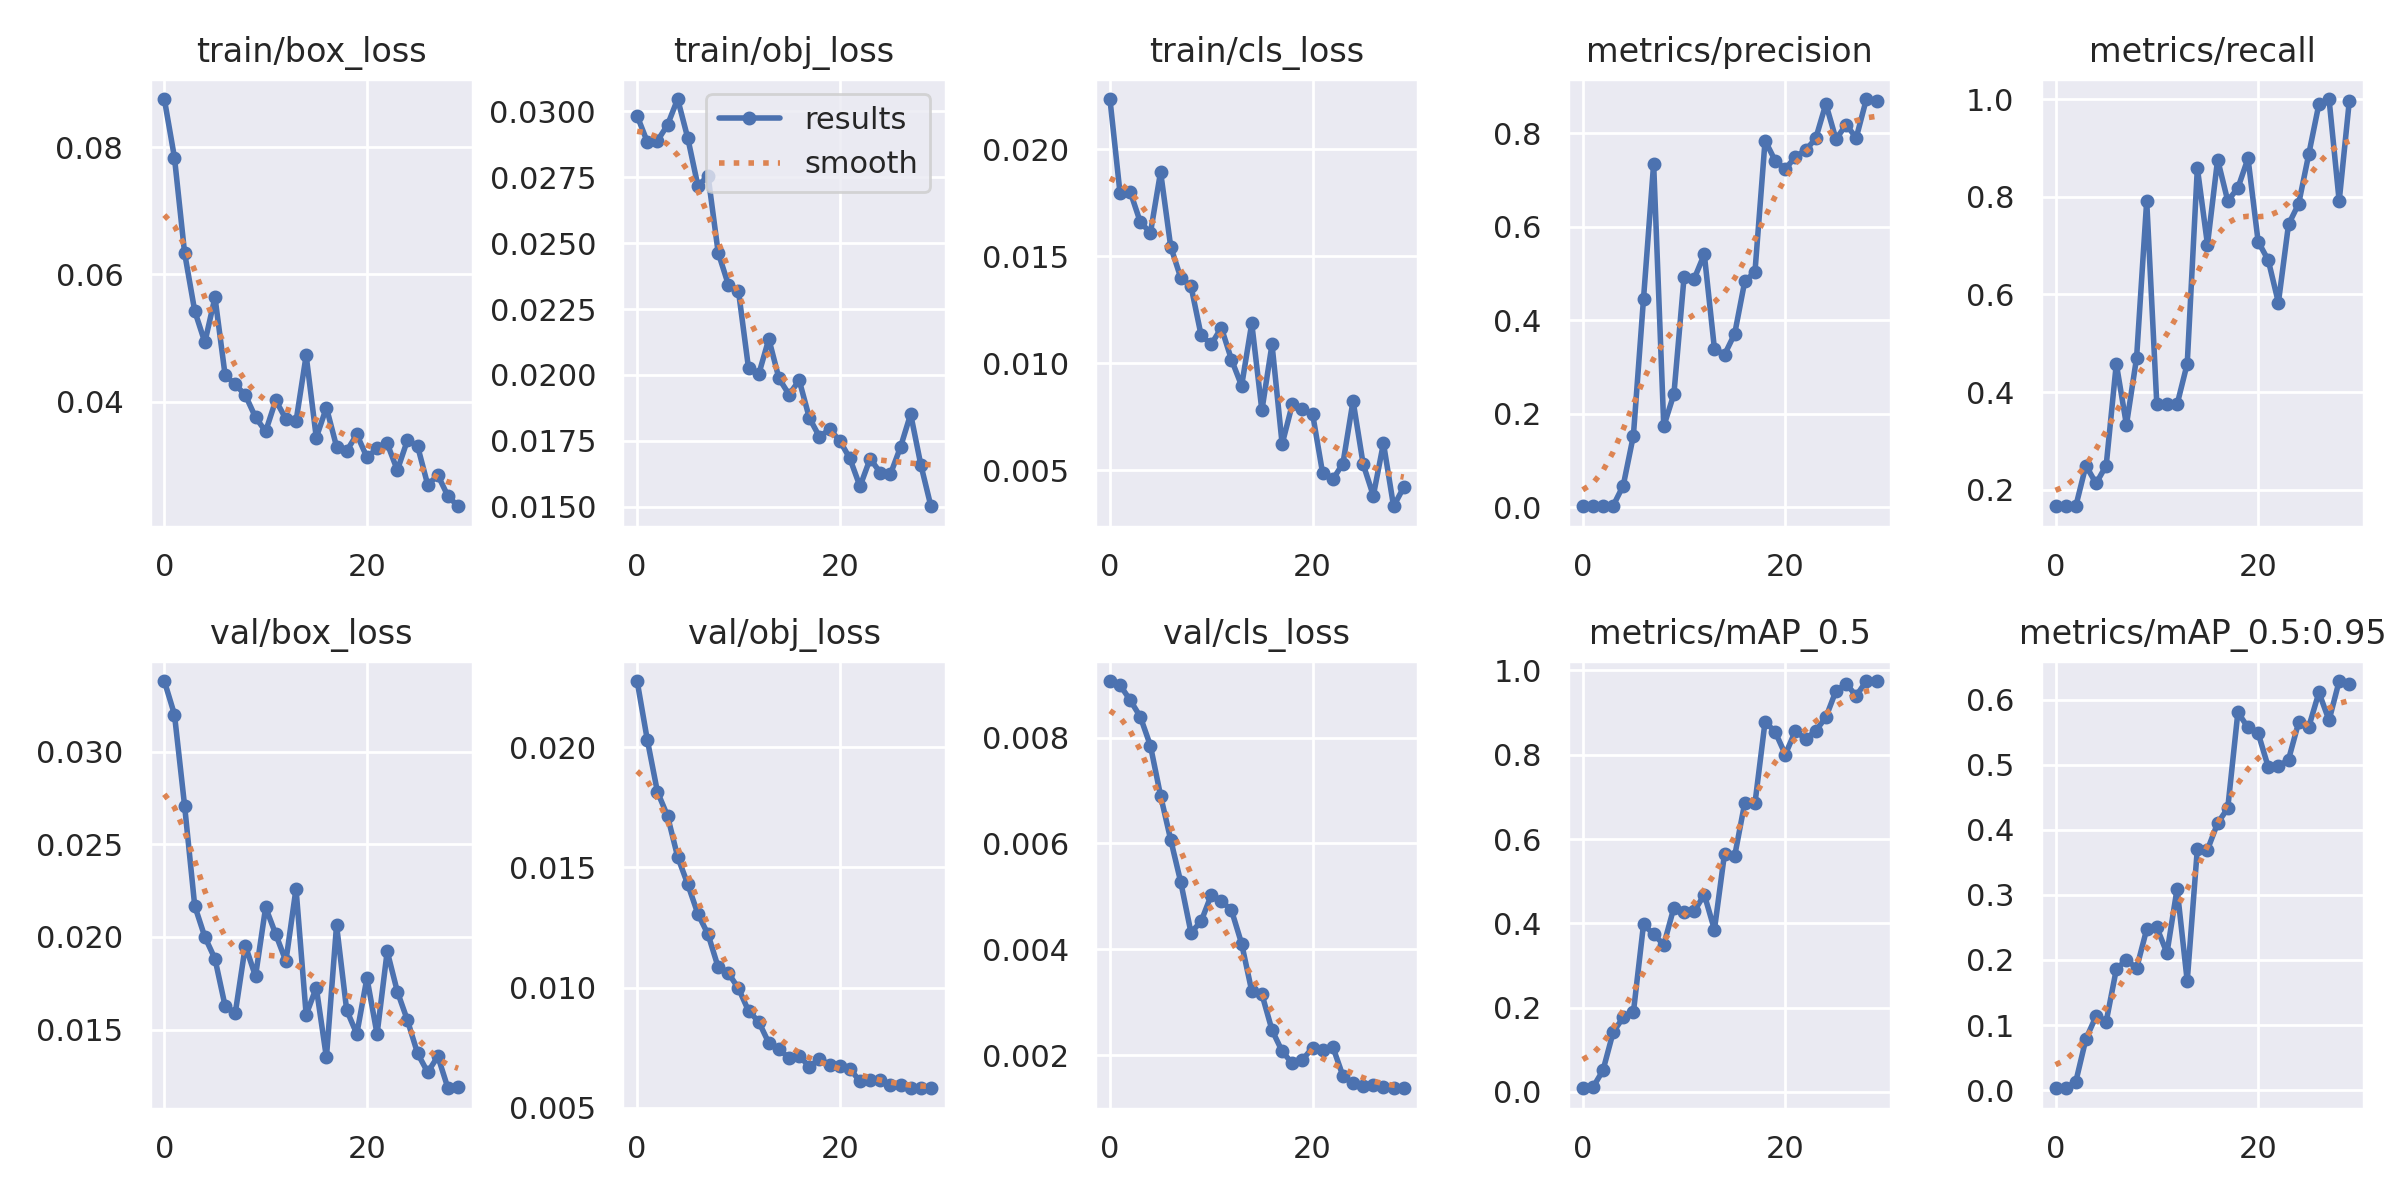

In [27]:
from IPython.display import Image
Image(filename='/content/yolov5/runs/train/treino_repo/results.png')


In [28]:
# Envie imagens .jpg/.png para o Colab
from google.colab import files
up = files.upload()  # escolha 1+ imagens
uploaded_paths = [f"/content/{n}" for n in up.keys()]
uploaded_paths


Saving B_02.jpg to B_02.jpg


['/content/B_02.jpg']

In [29]:
# Se você NÃO enviou imagens acima, vamos usar a pasta de teste do dataset
# (/content/datasets/images/test). Se enviou, usamos as imagens enviadas.
SRC = uploaded_paths if len(glob.glob("/content/*.jpg")) + len(glob.glob("/content/*.png")) > 0 else ["/content/datasets/images/test"]

# Rodar a detecção
import glob, os
%cd /content/yolov5
WEIGHTS = "/content/best.pt"   # já copiamos esse arquivo no passo anterior

# Monta a string de fontes (pode ter várias)
src_str = " ".join(SRC)
!python detect.py --weights {WEIGHTS} --img 640 --conf 0.35 --source {src_str}


/content/yolov5
detect: weights=['/content/best.pt'], source=/content/datasets/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-440-gf5ebc52c Python-3.12.11 torch-2.8.0+cu126 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/9 /content/datasets/images/test/A_05.jpg: 640x480 (no detections), 330.2ms
image 2/9 /content/datasets/images/test/A_15.jpg: 640x512 1 desenho, 394.1ms
image 3/9 /content/datasets/images/test/A_16.jpg: 640x480 (no detections), 335.0ms
image 4/9 /content/datasets/images/test/A_19.jpg: 640x512 (no detections), 511.4ms


Pasta de resultados: /content/yolov5/runs/detect/exp


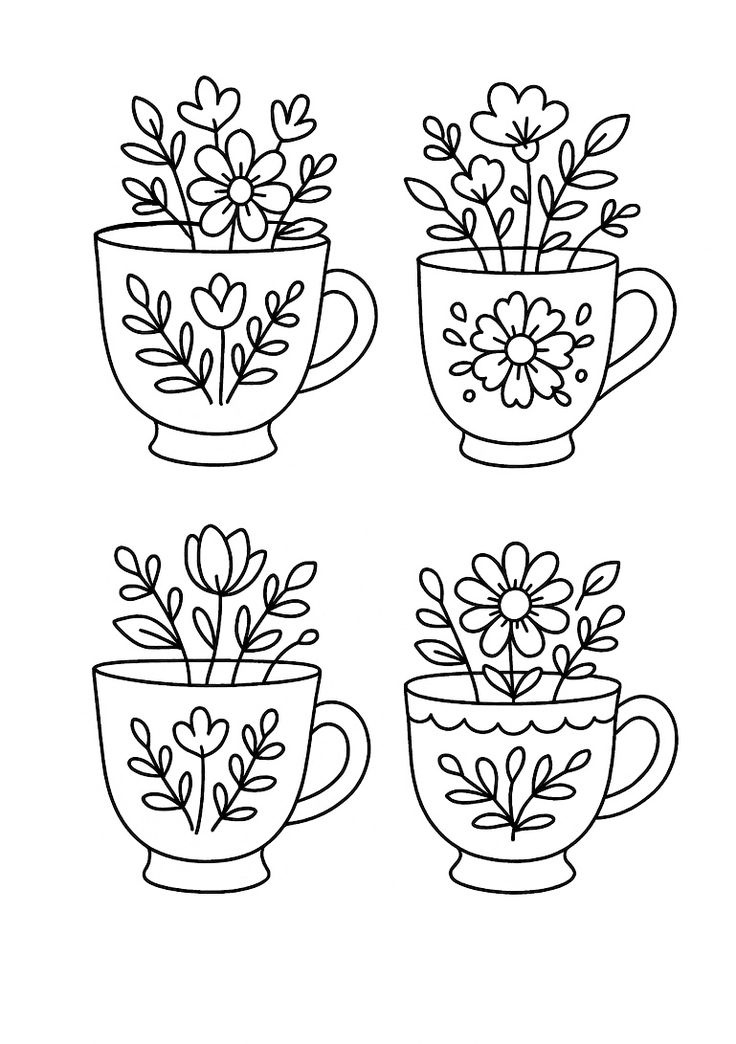

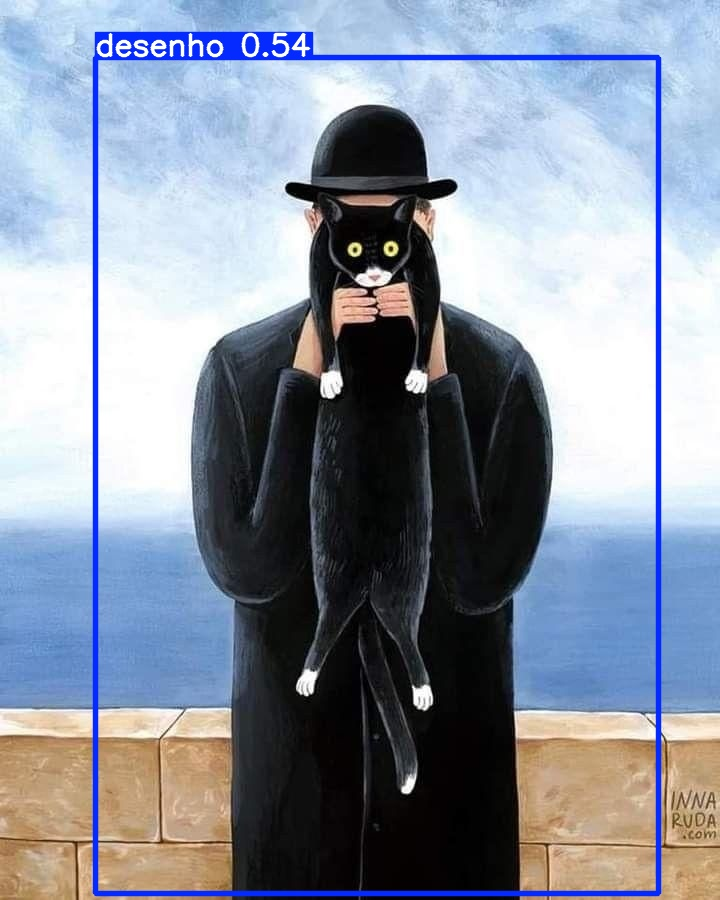

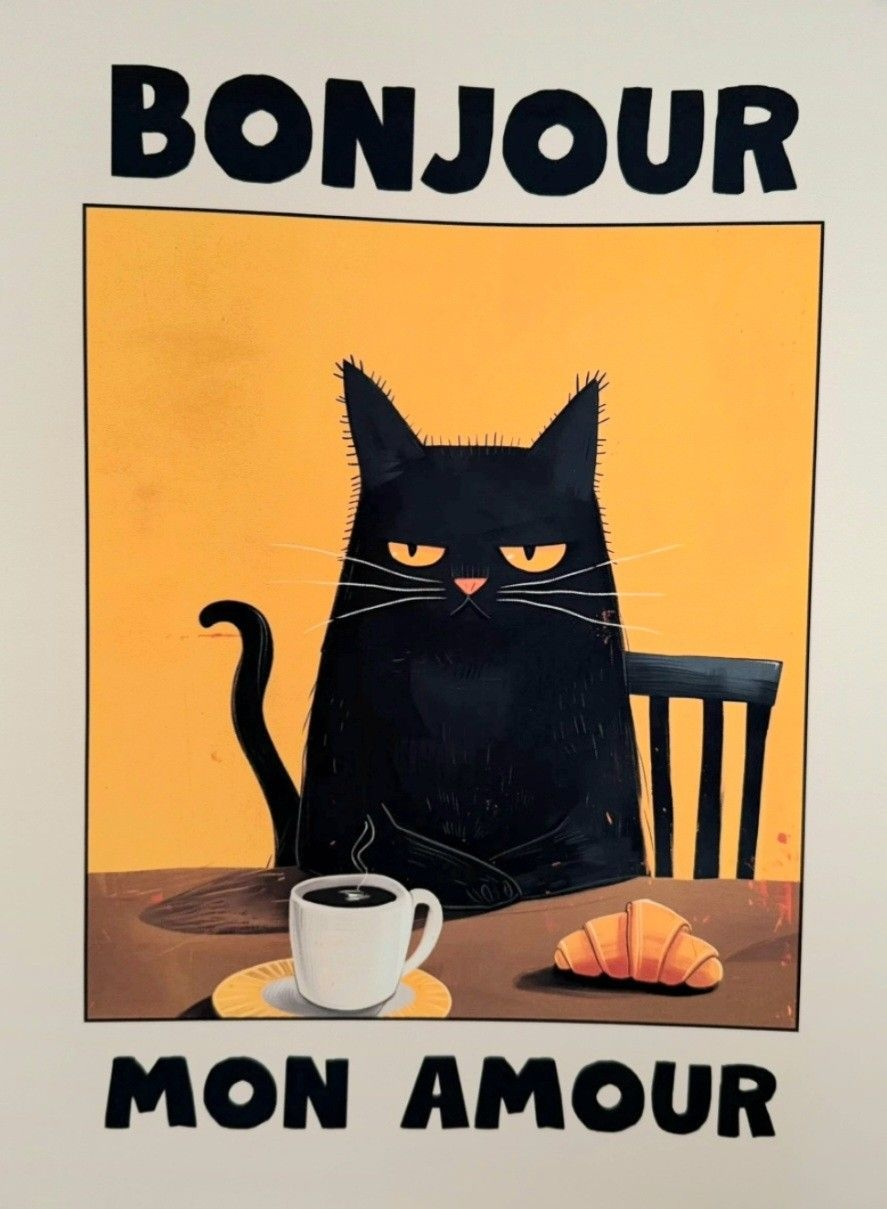

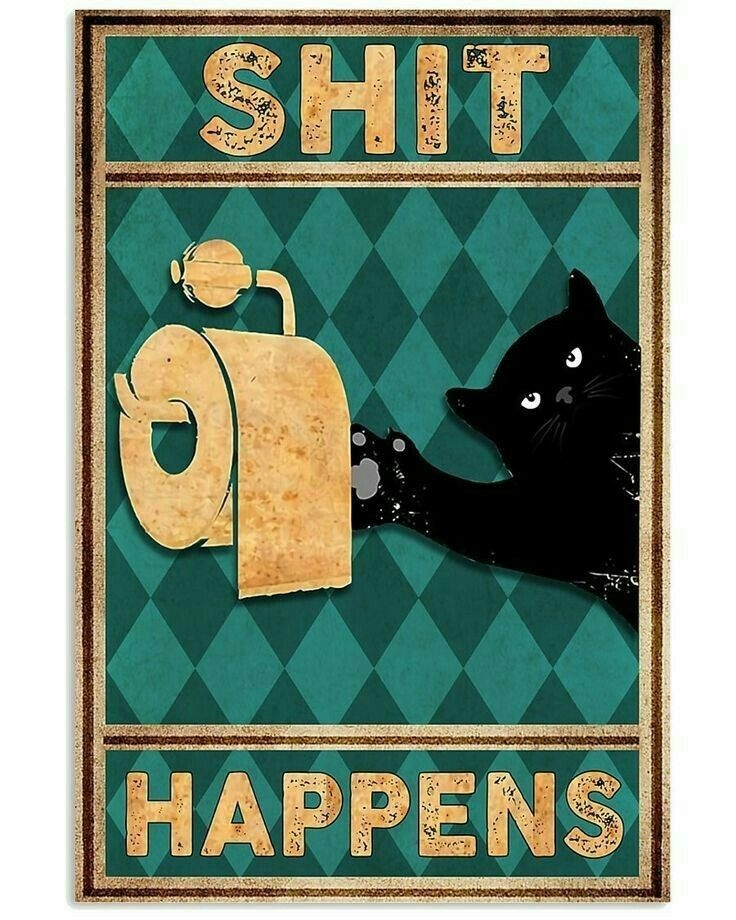

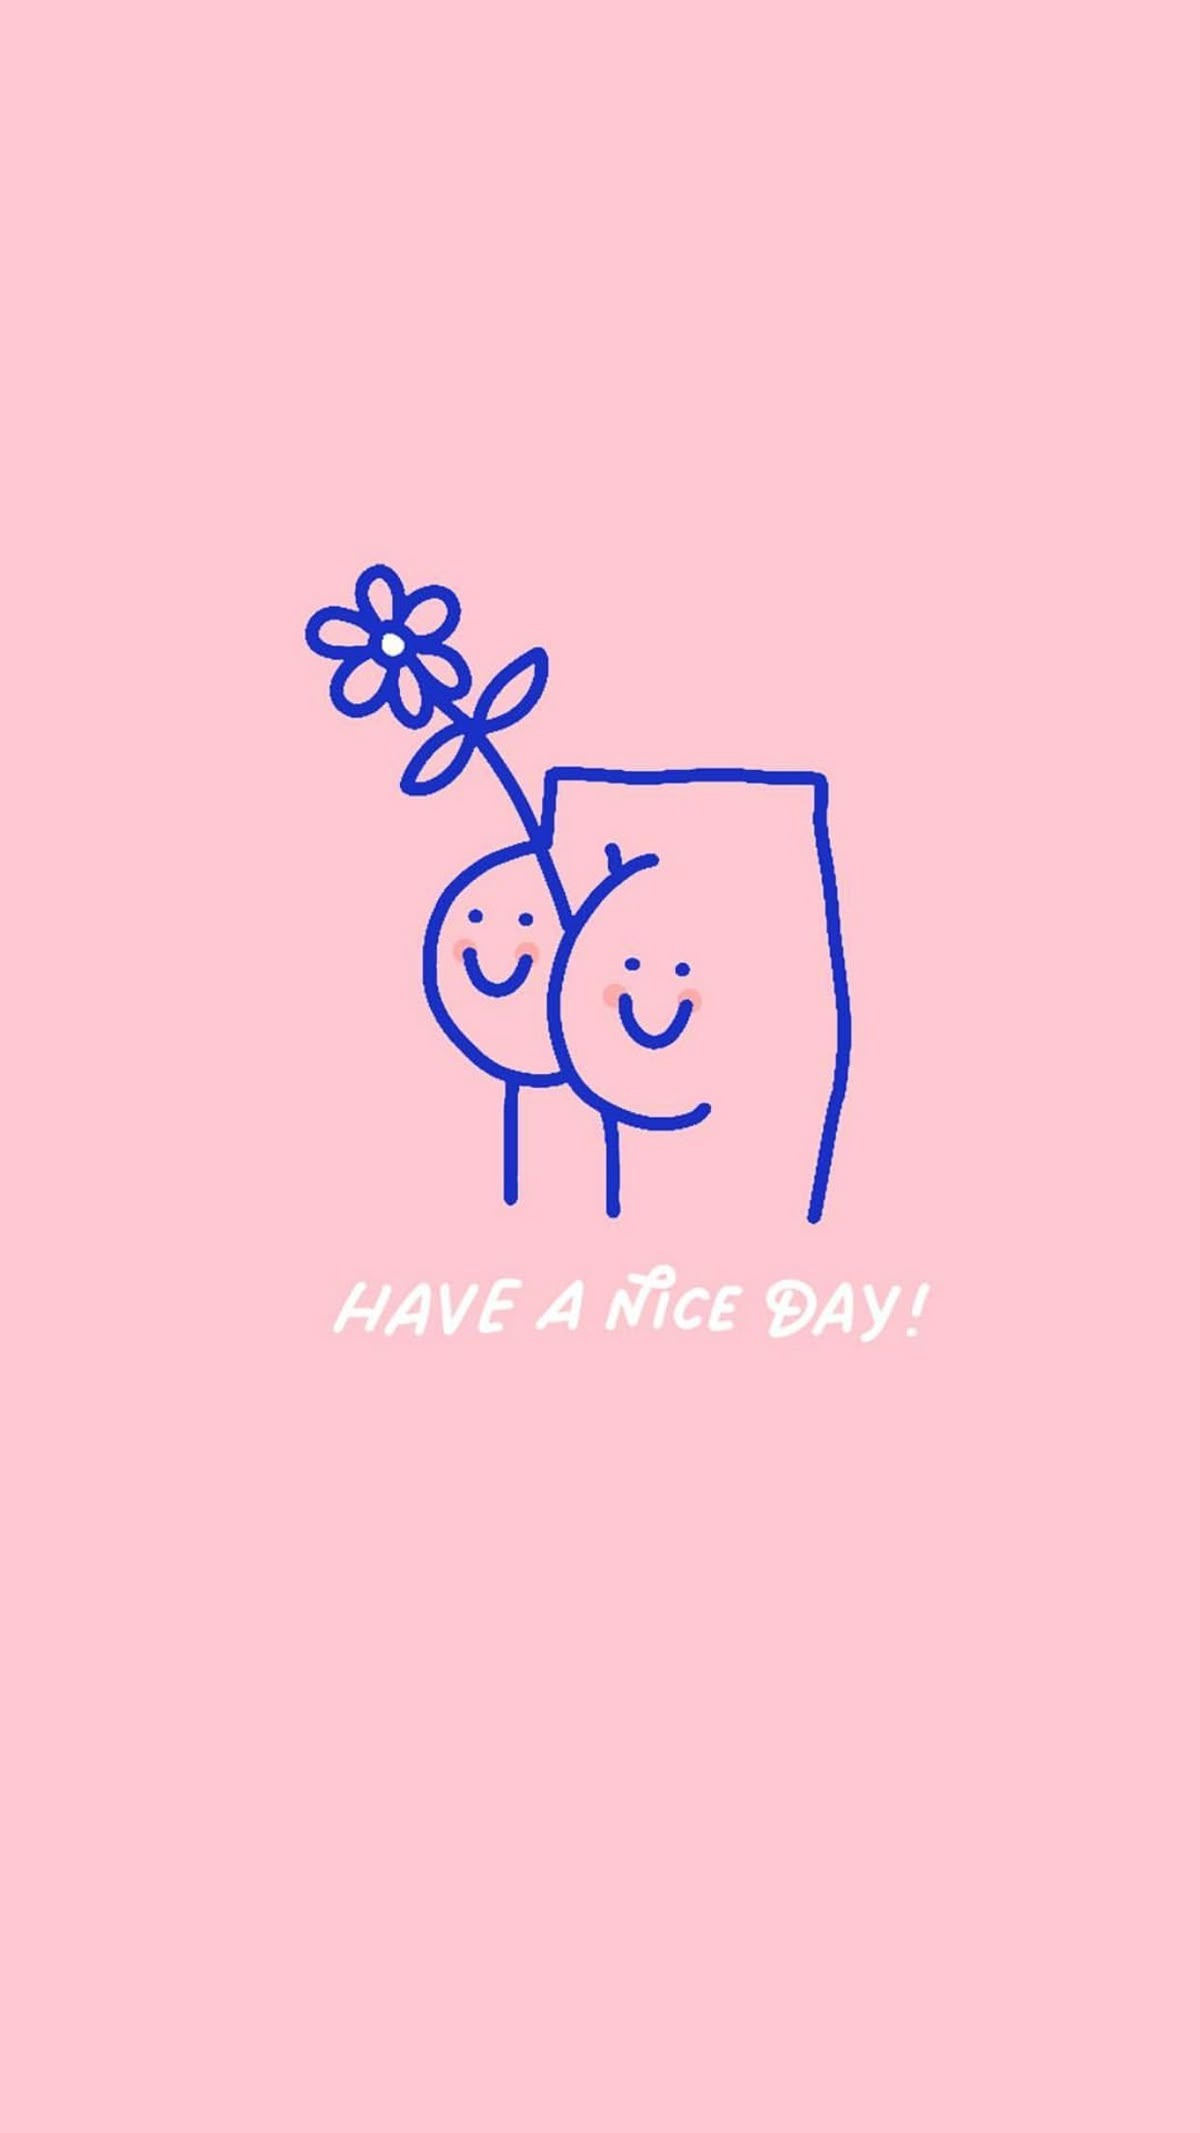

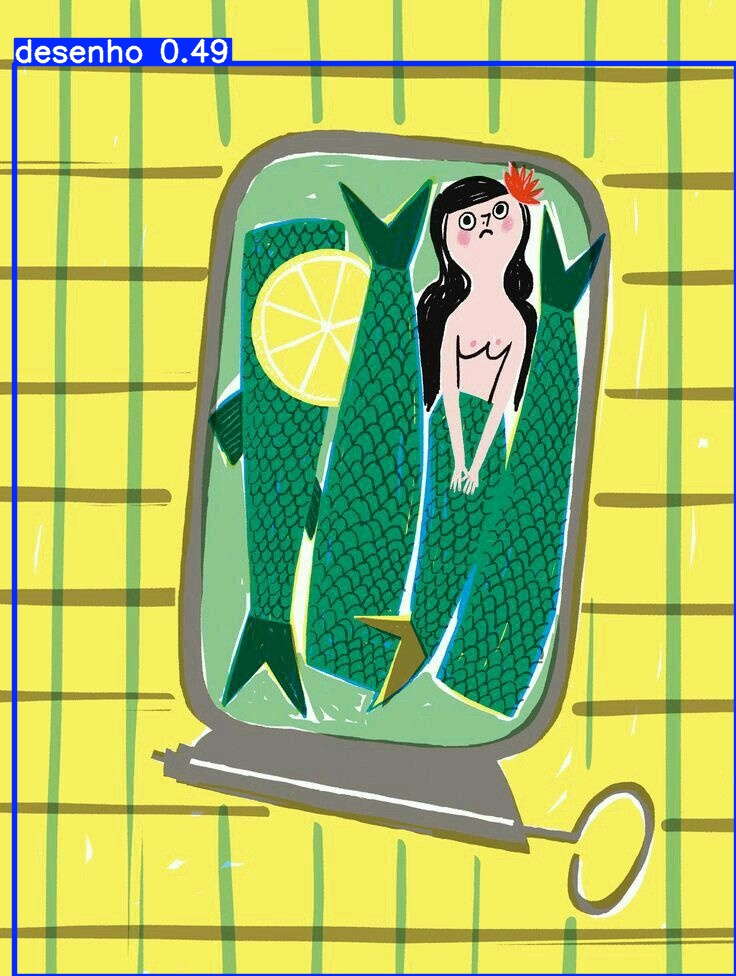

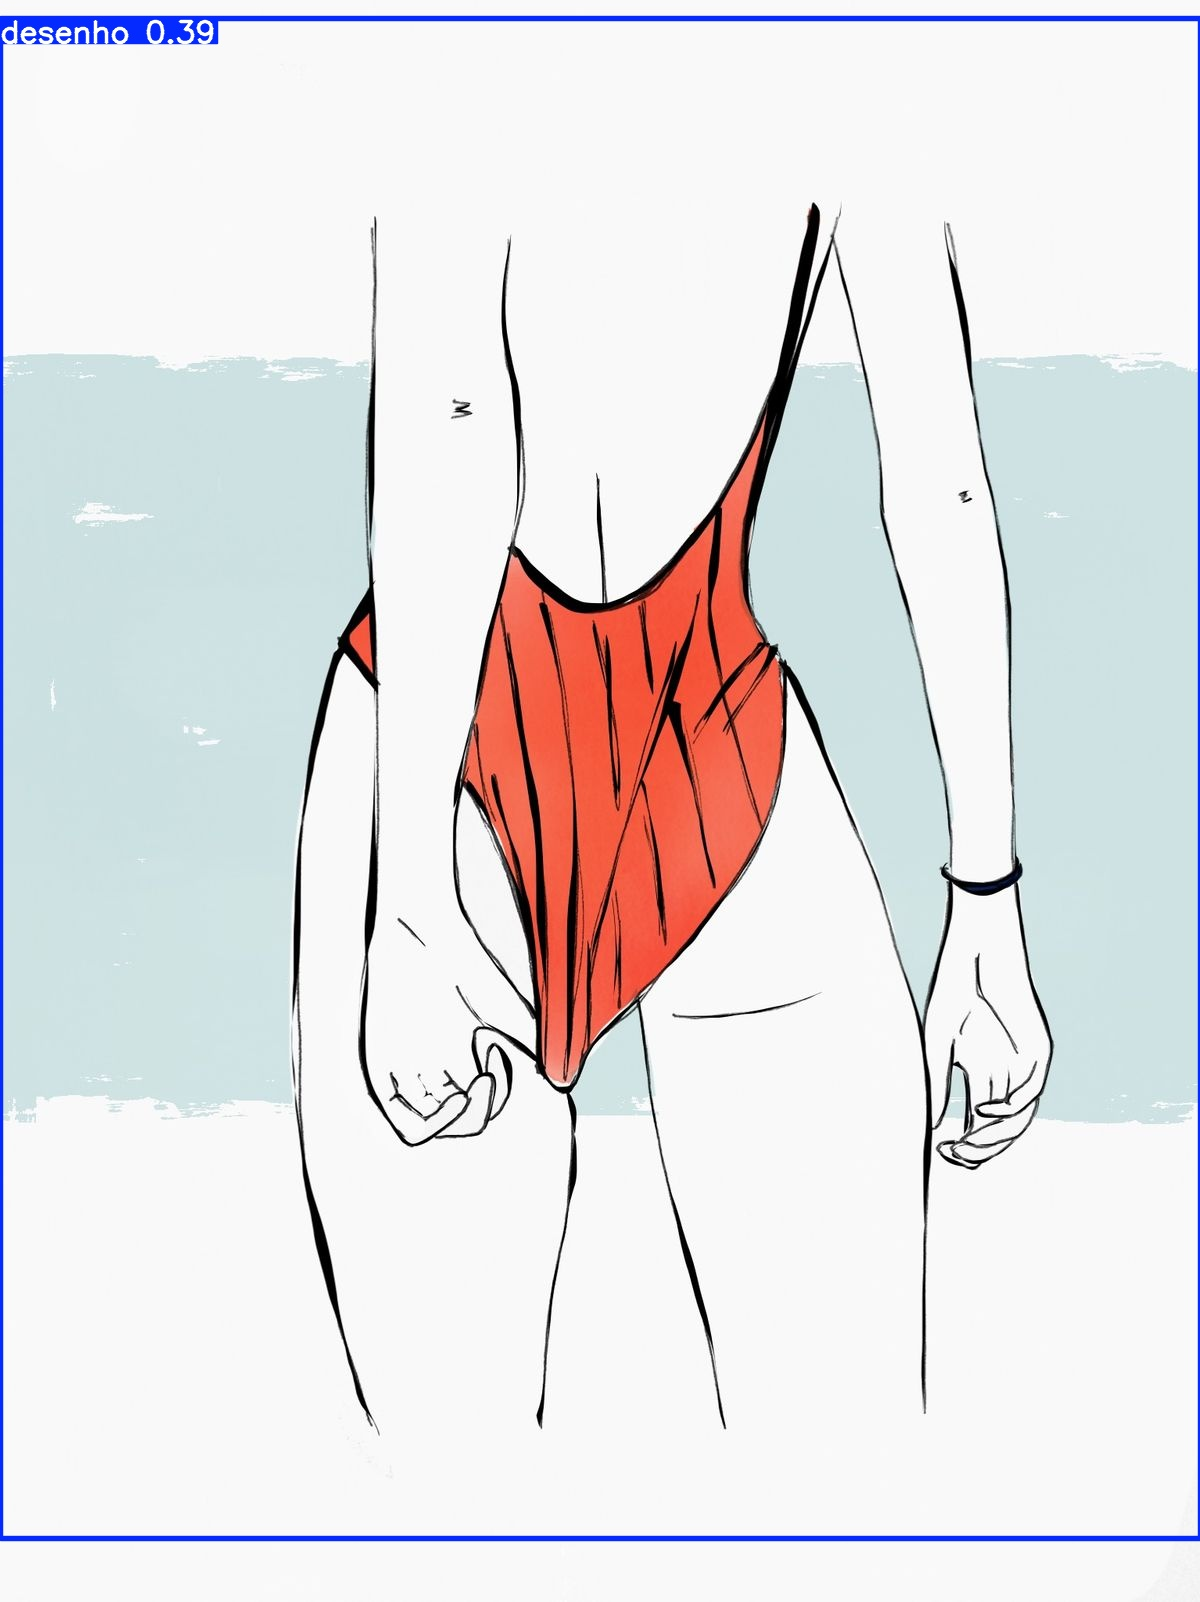

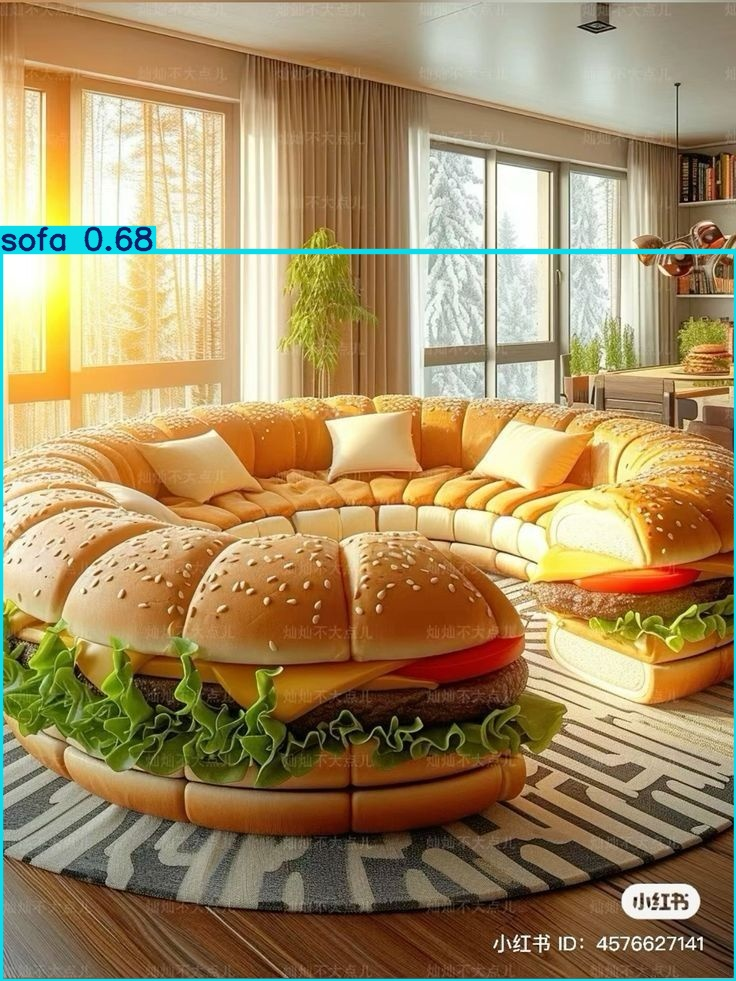

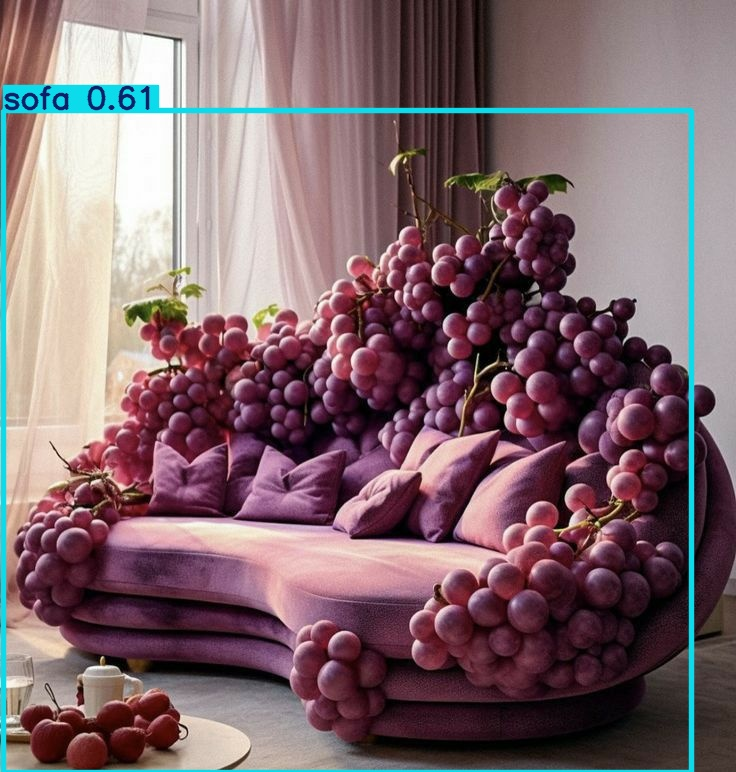

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Mostrar as imagens com as caixas desenhadas
import glob, os
from IPython.display import Image, display

latest = max(glob.glob('/content/yolov5/runs/detect/*'), key=os.path.getmtime)
print("Pasta de resultados:", latest)

for im in sorted(glob.glob(latest + '/*.jpg'))[:12]:  # mostra até 12 imagens
    display(Image(filename=im, width=800))

# (opcional) baixar um zip com as previsões
!zip -qr /content/preds.zip {latest}
from google.colab import files
files.download('/content/preds.zip')


In [31]:
from google.colab import files
files.download('/content/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
!ls /content/yolov5/runs/train/treino_repo/


confusion_matrix.png				     R_curve.png
events.out.tfevents.1760047429.715b0afec1a1.27645.0  results.csv
F1_curve.png					     results.png
hyp.yaml					     train_batch0.jpg
labels_correlogram.jpg				     train_batch1.jpg
labels.jpg					     train_batch2.jpg
opt.yaml					     val_batch0_labels.jpg
P_curve.png					     val_batch0_pred.jpg
PR_curve.png					     weights


In [33]:
!mkdir -p /content/docs

# imagens principais
!cp /content/yolov5/runs/train/treino_repo/results.png /content/docs/
!cp /content/yolov5/runs/train/treino_repo/confusion_matrix.png /content/docs/
!cp /content/yolov5/runs/train/treino_repo/labels.jpg /content/docs/
!cp /content/yolov5/runs/train/treino_repo/labels_correlogram.jpg /content/docs/
!cp /content/yolov5/runs/train/treino_repo/val_batch0_labels.jpg /content/docs/
!cp /content/yolov5/runs/train/treino_repo/val_batch0_pred.jpg /content/docs/

# curvas de desempenho
!cp /content/yolov5/runs/train/treino_repo/F1_curve.png /content/docs/
!cp /content/yolov5/runs/train/treino_repo/P_curve.png /content/docs/
!cp /content/yolov5/runs/train/treino_repo/R_curve.png /content/docs/
!cp /content/yolov5/runs/train/treino_repo/PR_curve.png /content/docs/


In [34]:
!zip -r /content/resultados_yolov5.zip /content/docs
from google.colab import files
files.download("/content/resultados_yolov5.zip")


  adding: content/docs/ (stored 0%)
  adding: content/docs/F1_curve.png (deflated 11%)
  adding: content/docs/P_curve.png (deflated 15%)
  adding: content/docs/labels.jpg (deflated 49%)
  adding: content/docs/results.png (deflated 7%)
  adding: content/docs/val_batch0_labels.jpg (deflated 20%)
  adding: content/docs/confusion_matrix.png (deflated 35%)
  adding: content/docs/val_batch0_pred.jpg (deflated 20%)
  adding: content/docs/R_curve.png (deflated 14%)
  adding: content/docs/labels_correlogram.jpg (deflated 47%)
  adding: content/docs/PR_curve.png (deflated 25%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>